# 행복지수와 요소들 간의 상관관계

In [11]:
import pandas as pd

df = pd.read_csv("datasets/2019.csv", sep=",")
df = pd.DataFrame(df)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


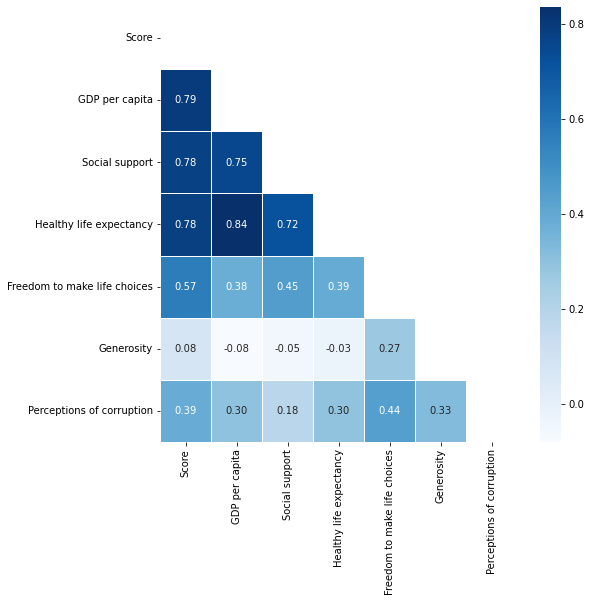

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.iloc[:, 2:].corr()

fig, ax = plt.subplots(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
heat_map = sns.heatmap(corr, linewidths=0.5, mask=mask, annot=True, fmt=".2f", cmap="Blues", ax=ax)

In [13]:
from scipy import stats

corr_data = dict()
score = df["Score"]

for col in df.columns[3:]:
    data = df[col]
    coef, p_value = stats.pearsonr(score, data)
    if (p_value < 0.05) and ((coef > 0.5)):
        corr_data[col] = coef
   
print(*corr_data.items(), sep="\n")

('GDP per capita', 0.7938828678781276)
('Social support', 0.7770577880638643)
('Healthy life expectancy', 0.7798831492425831)
('Freedom to make life choices', 0.5667418257199902)


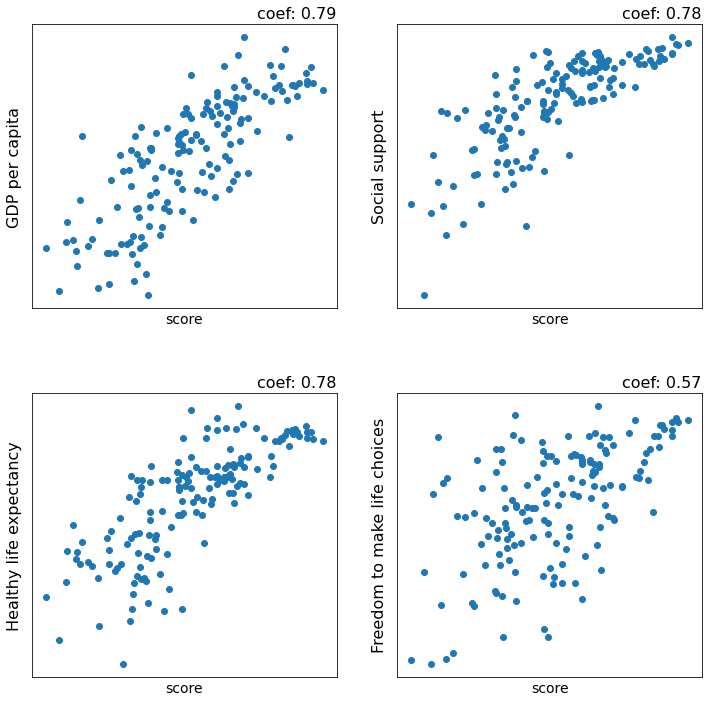

In [16]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

labels = corr_data.keys()
for n, label in enumerate(labels):
    ax = plt.subplot(2, 2, n + 1)
    ax.scatter(score, df[label])
    ax.set_title(f"coef: {corr_data[label]:.2f}", fontsize=16, loc='right')
    ax.set_xlabel("score", fontsize=14)
    ax.set_ylabel(label, fontsize=16, labelpad=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()